### ***Initializing and Importing Packages***

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import networkit as nk 
import networkx as nx
from igraph import *
import seaborn as sns

import Funcs

sns.color_palette("Set2")
sns.set_theme()
# For the image quality of the graphic. 
sns.set(rc={"figure.dpi":250})
# For the size of the graphics
sns.set(rc = {"figure.figsize":(5,5)})
sns.set(font_scale = 0.5)

DataDir = "../../Data/"
FigsDir = "../../Figs/"

symboles = ["ADA","BCH", "BNB", "BTC", "DASH", "DOGE", "EOS", "ETC"
    ,"ETH", "LSK", "LTC", "NEO", "OMG", "SOL", "TRX", "USDT"
    , "XEM", 'XLM', "XMR", "XRP"]


### ***Prepairing the Data*** 

In [2]:
Data = ["5MIN-ADA","5MIN-BCH", "5MIN-BNB", "5MIN-BTC", "5MIN-DASH", "5MIN-DOGE", "5MIN-EOS", "5MIN-ETC"
    ,"5MIN-ETH", "5MIN-LSK", "5MIN-LTC", "5MIN-NEO", "5MIN-OMG", "5MIN-SOL", "5MIN-TRX", "5MIN-USDT"
    , "5MIN-XEM", '5MIN-XLM', "5MIN-XMR", "5MIN-XRP"]

Funcs.RepairData(DataDir, Data,symboles)

#### ***Plotting the Returns*** 

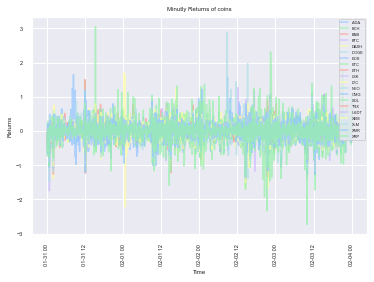

In [3]:
returns_df = Funcs.LoadData(DataDir, symboles)
plt.style.use('seaborn-pastel')
for sym in symboles:
    plt.plot(returns_df['time_close'], returns_df['%s' % sym], label = '%s' % sym, alpha = 0.7)

plt.title('Minutly Returns of coins')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Returns')
plt.legend(loc=1, prop={'size': 4})
plt.show()

### ***The Eddy-Fuller test***

In [4]:
Funcs.Eddy_Fuller_test(returns_df, symboles)

p-value (ADA) = 6.478327163602919e-30 
p-value (BCH) = 0.0 
p-value (BNB) = 7.462002109559143e-29 
p-value (BTC) = 2.027917833467083e-30 
p-value (DASH) = 0.0 
p-value (DOGE) = 0.0 
p-value (EOS) = 0.0 
p-value (ETC) = 0.0 
p-value (ETH) = 0.0 
p-value (LSK) = 0.0 
p-value (LTC) = 0.0 
p-value (NEO) = 2.1811778031896096e-20 
p-value (OMG) = 0.0 
p-value (SOL) = 0.0 
p-value (TRX) = 0.0 
p-value (USDT) = 1.1464375577220652e-18 
p-value (XEM) = 2.1461952303119207e-30 
p-value (XLM) = 0.0 
p-value (XMR) = 6.457843574539339e-30 
p-value (XRP) = 0.0 


### ***Optimum Lag***

In [5]:
Funcs.Optimum_lag(returns_df, symboles,24, 1, 3)

,AIC,BIC,FPE,HQIC
0,-7.181,-7.172*,0.0007612,-7.177*
1,-7.179,-7.152,0.0007627,-7.169
2,-7.181,-7.136,0.0007610,-7.164
3,-7.190*,-7.127,0.0007544*,-7.166
4,-7.187,-7.107,0.0007561,-7.157
5,-7.182,-7.084,0.0007599,-7.145
6,-7.178,-7.062,0.0007635,-7.134
7,-7.185,-7.052,0.0007577,-7.135
8,-7.188,-7.037,0.0007553,-7.131
9,-7.184,-7.015,0.0007584,-7.120


### ***Granger-Cause Test***

In [6]:
maxlag_ = 3
P_val_Dataframe, F_val_Dataframe = Funcs.grangers_causation_matrix(returns_df.iloc[:, 1:], maxlag_, variables=returns_df.columns[1:])


In [7]:
F_val_Dataframe #the dataframe consisting of the F scores for lag = 4

,ADA_x,BCH_x,BNB_x,BTC_x,DASH_x,DOGE_x,EOS_x,ETC_x,ETH_x,LSK_x,LTC_x,NEO_x,OMG_x,SOL_x,TRX_x,USDT_x,XEM_x,XLM_x,XMR_x,XRP_x
ADA_y,0.0000,1.2549,1.2103,0.7987,1.3490,0.3641,0.8238,0.0998,1.0076,3.1272,0.8436,0.3553,2.3085,1.3893,1.3146,14.4796,0.1836,0.9540,0.6929,0.1741
BCH_y,1.9392,-0.0000,3.2536,5.0862,0.3005,1.1946,0.3394,1.8123,4.3029,2.9321,0.0774,2.0965,1.2803,0.4998,0.7763,10.1876,1.4138,1.2054,1.6745,0.6923
BNB_y,3.0337,1.8418,0.0000,1.8724,3.3849,0.5415,4.4168,1.9873,1.8025,0.5856,3.4936,2.3184,4.5297,2.8754,3.0364,15.6093,0.3909,1.5543,0.2217,1.9753
BTC_y,0.9900,4.9583,3.4384,0.0000,4.3590,0.4899,4.9392,1.1702,1.4771,1.4844,5.7660,1.3740,5.6212,2.5811,5.0848,15.5981,0.4368,1.8153,0.3090,2.1532
DASH_y,0.3916,0.7641,0.4933,1.4451,0.0000,0.1201,2.3413,0.4620,1.4841,1.2503,0.6957,1.2121,2.0137,1.4533,1.1012,4.3262,1.2286,0.5492,0.3665,0.8210
DOGE_y,2.5747,0.8514,1.4243,3.2055,1.0219,0.0000,2.5159,1.2405,2.7154,3.2890,1.4993,0.8980,2.2935,3.0542,0.7506,9.5514,0.5516,0.4176,0.5246,1.0782
EOS_y,0.6189,2.1069,2.9513,2.5893,1.6212,0.7709,0.0000,1.8821,5.8922,1.8824,0.9517,6.0693,3.2259,2.3463,1.5641,13.9042,0.9147,1.4055,0.7300,0.4716
ETC_y,1.5820,0.8096,2.2379,2.3281,0.2455,0.5753,0.9327,-0.0000,2.4335,1.6972,0.8183,0.7481,2.0991,1.0503,1.1579,4.7042,0.9958,0.9228,0.8487,0.3998
ETH_y,1.5467,1.2530,0.3359,1.0155,1.5369,0.4696,3.2297,0.2605,0.0000,1.3765,2.9735,1.1419,2.7939,1.6850,0.9746,11.8352,0.2256,0.4010,0.1469,1.0595
LSK_y,7.8734,6.4507,5.0628,4.9360,7.8739,3.0655,4.8705,5.6051,6.7560,-0.0000,7.3543,2.8719,5.5752,5.9343,8.5885,17.8561,2.0554,6.2370,1.8368,4.8172


In [8]:
P_val_Dataframe #the dataframe consisting the minimum p-values

,ADA_x,BCH_x,BNB_x,BTC_x,DASH_x,DOGE_x,EOS_x,ETC_x,ETH_x,LSK_x,LTC_x,NEO_x,OMG_x,SOL_x,TRX_x,USDT_x,XEM_x,XLM_x,XMR_x,XRP_x
ADA_y,1.0000,0.2129,0.3014,0.1140,0.1517,0.5203,0.2818,0.8377,0.2821,0.0024,0.2149,0.7838,0.0232,0.0857,0.2650,0.0000,0.9068,0.4106,0.1900,0.7744
BCH_y,0.1111,1.0000,0.0087,0.0015,0.5804,0.1128,0.7388,0.0887,0.0017,0.0033,0.8238,0.0967,0.1480,0.4256,0.3197,0.0000,0.1599,0.1966,0.0362,0.5306
BNB_y,0.0273,0.0244,1.0000,0.1298,0.0051,0.6042,0.0040,0.1117,0.1422,0.1290,0.0119,0.0720,0.0005,0.0108,0.0039,0.0000,0.5045,0.0789,0.7160,0.1135
BTC_y,0.2052,0.0004,0.0060,1.0000,0.0003,0.3532,0.0012,0.0833,0.0681,0.0609,0.0001,0.1784,0.0002,0.0064,0.0003,0.0000,0.5582,0.0272,0.8140,0.0132
DASH_y,0.5709,0.2507,0.6180,0.1469,1.0000,0.5359,0.0313,0.5996,0.1499,0.0345,0.4125,0.3008,0.0441,0.1197,0.2719,0.0010,0.1922,0.4348,0.3619,0.4793
DOGE_y,0.0510,0.2679,0.1576,0.0215,0.1602,1.0000,0.0552,0.2904,0.0421,0.0007,0.2100,0.4384,0.0345,0.0265,0.2355,0.0000,0.4604,0.5614,0.4399,0.3540
EOS_y,0.4498,0.0954,0.0269,0.0430,0.0710,0.3493,1.0000,0.1087,0.0003,0.0357,0.2212,0.0002,0.0056,0.0252,0.1007,0.0000,0.2938,0.1385,0.3381,0.4773
ETC_y,0.0966,0.3210,0.0801,0.0634,0.8314,0.2985,0.1209,1.0000,0.0361,0.0618,0.1867,0.2842,0.0322,0.3075,0.3197,0.0018,0.2637,0.3305,0.2540,0.6118
ETH_y,0.1977,0.0600,0.4191,0.2373,0.0316,0.6126,0.0208,0.6641,1.0000,0.0399,0.0255,0.3277,0.0075,0.0655,0.1122,0.0000,0.6328,0.2716,0.7007,0.2125
LSK_y,0.0000,0.0002,0.0002,0.0019,0.0000,0.0044,0.0008,0.0001,0.0001,1.0000,0.0001,0.0340,0.0001,0.0001,0.0000,0.0000,0.0269,0.0000,0.0769,0.0002


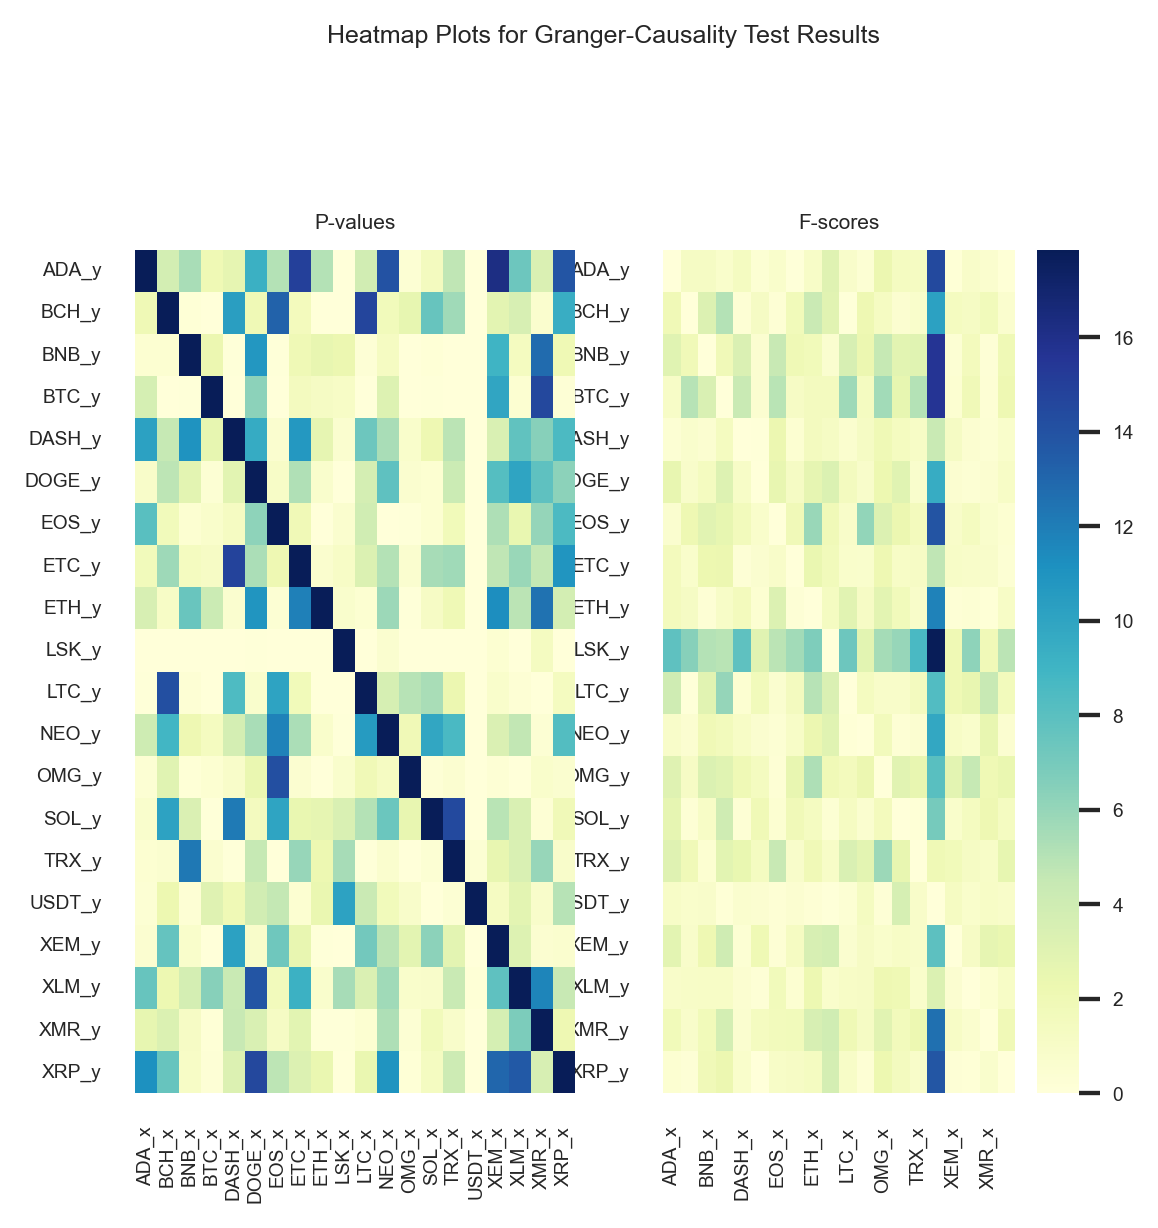

In [23]:
plt.subplot(1,2,2)
sns.heatmap(F_val_Dataframe, annot = False, cmap="YlGnBu")
plt.title('F-scores')

plt.subplot(1,2,1)
sns.heatmap(P_val_Dataframe, annot = False, cmap="YlGnBu" , cbar = False, )
plt.title('P-values')
plt.xticks(rotation=90)

plt.suptitle('Heatmap Plots for Granger-Causality Test Results')
plt.subplots_adjust(top=0.8)


### ***Graph***

In [10]:
Matrix_ = Funcs.ScaleData(P_val_Dataframe)

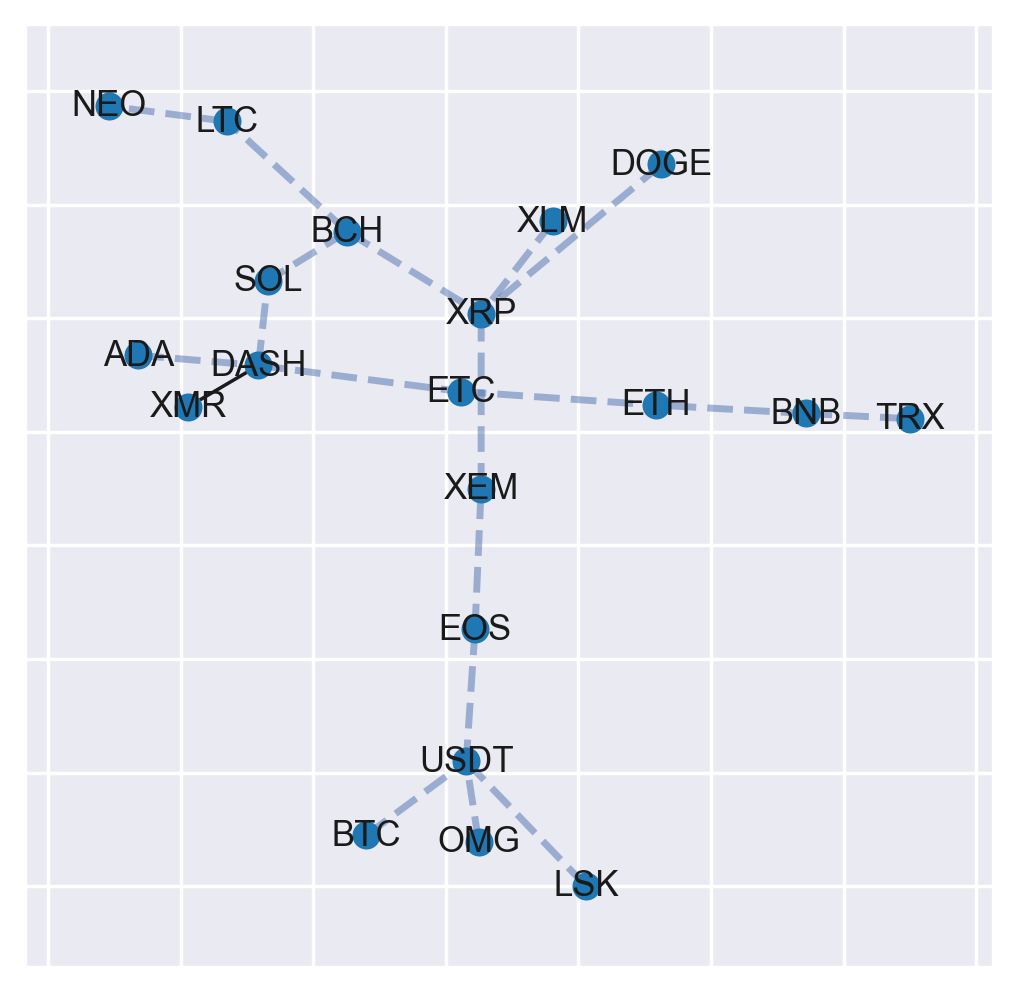

In [24]:
Funcs.MST_Graph(Matrix_, symboles)

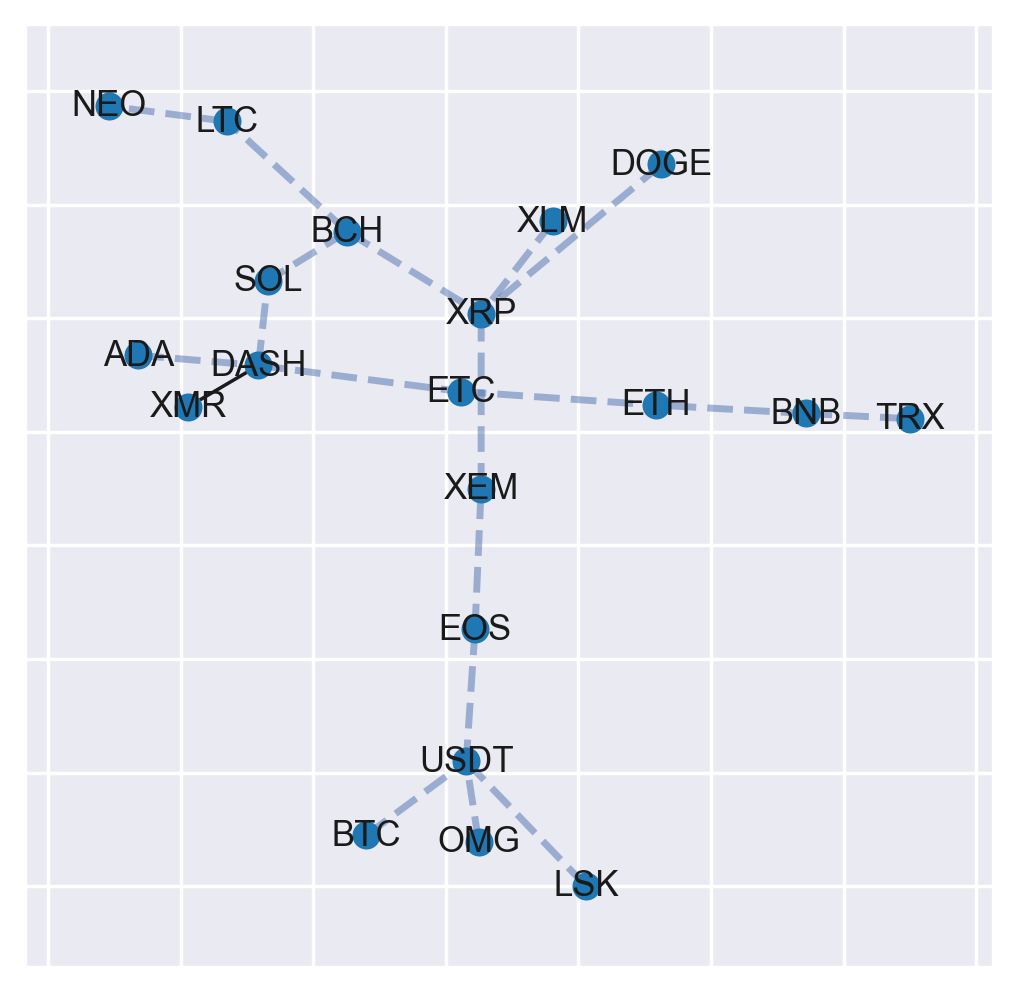

In [25]:
Matrix_ = np.array(F_val_Dataframe)
Funcs.MST_Graph(Matrix_, symboles)